<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/Agent%20Based%20Models/zorros_conejos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zorros y Conejos - Agent Based Models

Los métodos de Montecarlo también ayudan a resolver problemas en Biología. Recuerde el sistema de Lotka volterra que simula la interacción entre presa y depredador. Estas ecuaciones son deterministicas y presenta nula variabilidad lo cual no coincide con las observaciones. Una forma de introducir esta variabilidad es usando modelos probabilísticos como el que se propone a continuación.

Suponga que zorros y conejos cohabitan una rejilla 2D y la dinámica de la población en dicha rejilla está regida por la siguientes reglas:

1. Si una celda está vacía, entonces con probabilidad $P_a$ un nuevo conejo puede aparecer en esta celda.
2. Si una celda está ocupada por un zorro, con una probabilidad $P_d$ el zorro muere
3. Si una celda está ocupada por un zorro y hay un conejo en alguna de las celdas adyacentes, con una probabilidad $P_c$ un nuevo zorro aparece en el lugar del conejo

Simule este sistema en una rejilla de $20x20$, con los siguientes valores de probailidad

$P_a = 0.05$, $P_c = 0.4$, $P_d = 0.25$

Asuma una población inicial de 30 zorros y 100 conejos colocados aleatoriamente en la rejilla

Índices aleatorios seleccionados: [  3 164 204 143  50 195  59 370 388  83  71 171 166 292 261  86  38 397
 356 221 226  69 137 165 300 197 216 298  41  15  28 311  36 379 129 382
 324 184 369 268  70  65  11  57 233 264 235 142 185 387 232 202 342 161
 381 329  60 159 323 238 312 223 237 347 225   1 266  34 243 110 228 338
  17 341 321  76 305 310 255  99 259 279 363 158 121 333 135 332 399 254
 220 296 145 128   6 396 163 316 103  43 377 177 331 169  74 102 258   0
 256 359 398 355 395 290 265 287 302 385 224 106  58 112 191 133  62 111
 337 156 119 213]


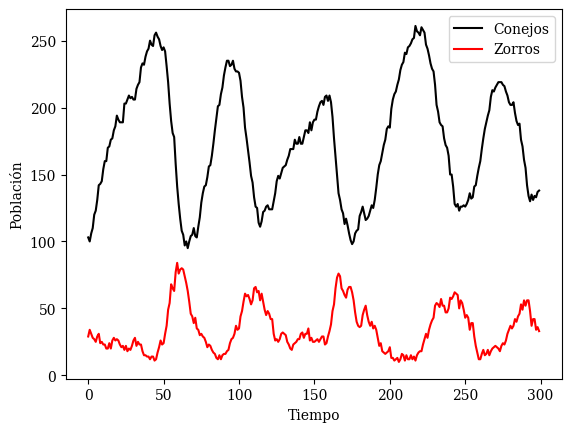

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from matplotlib import rc
from matplotlib.colors import ListedColormap

# Parámetros
Pob_in_Zorro = 30
Pob_in_Conejo = 100
P_a = 0.05  # Probabilidad de aparición de conejos
P_c = 0.4   # Probabilidad de depredación
P_d = 0.25  # Probabilidad de muerte del zorro
tf = 300
N = 20
rej = np.zeros((N, N))

# Inicialización aleatoria de conejos y zorros
indices = np.random.choice(N * N, 130, replace=False)
print("Índices aleatorios seleccionados:", indices)

# Colocar zorros
for i in range(Pob_in_Zorro):
    indice = indices[i]
    fila = indice // N  # Cálculo de la fila
    columna = indice % N  # Cálculo de la columna
    rej[fila, columna] = 1  # Coloca zorros

# Colocar conejos
for j in range(Pob_in_Zorro, 130):
    indice = indices[j]
    fila = indice // N  # Cálculo de la fila
    columna = indice % N  # Cálculo de la columna
    rej[fila, columna] = 2  # Coloca conejos

graficas = []
tiempos = []
conejos = []
zorros = []
count = 0

# Simulación
for k in range(tf):
    count += 1
    rej_old = np.copy(rej)

    for i in range(N):
        for j in range(N):
            r_a = np.random.rand()
            r_d = np.random.rand()

            # Primera Regla: Si la celda está vacía, puede aparecer un conejo
            if rej_old[i, j] == 0 and r_a < P_a:
                rej[i, j] = 2

            # Segunda Regla: Si hay un zorro, puede morir
            if rej_old[i, j] == 1 and r_d < P_d:
                rej[i, j] = 0

            # Tercera Regla: Si hay un zorro, busca conejos adyacentes
            if rej_old[i, j] == 1:
                # Definir vecinos con manejo de bordes
                vecinos = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
                vecinos = [(x % N, y % N) for x, y in vecinos]  # bordes

                for vx, vy in vecinos:
                    if rej_old[vx, vy] == 2:  # Si hay un conejo
                        r = np.random.rand()
                        if r < P_c:  # Probabilidad de depredación
                            rej[vx, vy] = 1  # El conejo es comido, aparece un zorro

    # Contar zorros y conejos
    conejos.append(np.sum(rej == 2))
    zorros.append(np.sum(rej == 1))

    # Guardar el estado de la rejilla cada 10 pasos
    if count % 10 == 0:
        graficas.append(np.copy(rej))
        tiempos.append(k)

#Gráficos de población a lo largo del tiempo
plt.plot(conejos, label='Conejos', color='black')
plt.plot(zorros, label='Zorros', color='red')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.show()

# Función para animación
rc('animation', html='html5')
fig, ax = plt.subplots()
cmap = ListedColormap(["white", "red", "black"])  # Blanco = vacío, Rojo = conejo, Negro = zorro
def animate(i):
    ax.clear()
    ax.set_title(f"Vida a lo largo del tiempo: {tiempos[i]}", fontsize=16)
    ax.imshow(graficas[i], cmap=cmap, vmin=0, vmax=2)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# Crear la animación
ani = animation.FuncAnimation(fig, animate, frames=len(graficas), interval=200)

# Mostrar la animación
plt.close()
ani
